## Assignment 06 - CNN
* The Fashion-MNIST dataset is proposed as a more challenging replacement dataset for the MNIST dataset. It is a dataset comprised of 60,000 small square 28×28 pixel grayscale images of items of 10 types of clothing, such as shoes, t-shirts, dresses, and more.
* Create a convolutional neural network (CNN) architecture to classify the ten different types of objects present in the fashion MNIST dataset

### Importing Libraries and Dataset

In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [2]:
from keras.datasets import fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

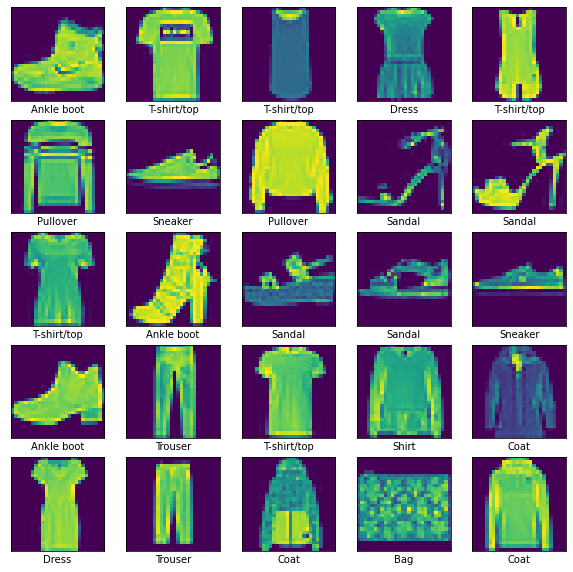

In [3]:
class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [4]:
train_images, test_images = train_images / 255.0, test_images / 255.0

### Fitting the CNN model

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.optimizers import SGD
import tensorflow as tf
import matplotlib.pyplot as plt

In [5]:
from tensorflow.keras.utils import to_categorical
train_labels_oh = to_categorical(train_labels)
test_labels_oh = to_categorical(test_labels)

In [10]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu',  input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())

model.add(Dense(32, activation='relu'))
model.add(Dense(10,activation='softmax'))

In [11]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
history = model.fit(train_images, train_labels_oh, epochs=10, 
                    validation_data=(test_images, test_labels_oh))

Epoch 1/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.4605 - accuracy: 0.8386 - val_loss: 0.3688 - val_accuracy: 0.8656
Epoch 2/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.3142 - accuracy: 0.8901 - val_loss: 0.3120 - val_accuracy: 0.8876
Epoch 3/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2727 - accuracy: 0.9035 - val_loss: 0.3025 - val_accuracy: 0.8931
Epoch 4/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2464 - accuracy: 0.9111 - val_loss: 0.2859 - val_accuracy: 0.8966
Epoch 5/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2258 - accuracy: 0.9183 - val_loss: 0.2711 - val_accuracy: 0.9028
Epoch 6/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.2070 - accuracy: 0.9248 - val_loss: 0.2891 - val_accuracy: 0.8984
Epoch 7/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1912 - accuracy: 0.9303 - val_loss: 0.2715 - val_ac

In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 32)                173088    
                                                                 
 dense_1 (Dense)             (None, 10)                330       
                                                                 
Total params: 173,738
Trainable params: 173,738
Non-trainable params: 0
________________________________________________

### Model evaluation

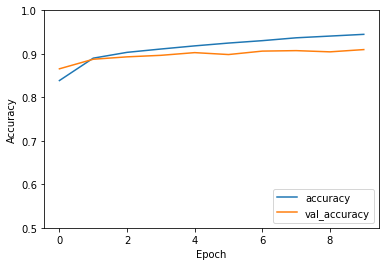

In [21]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

* We can see that both graphs are very similar even though there is a very slight tendency of overfitting.

In [22]:
test_loss, test_acc = model.evaluate(test_images,  test_labels_oh, verbose=2)

313/313 - 1s - loss: 0.2747 - accuracy: 0.9098 - 658ms/epoch - 2ms/step


**Here we have fitted the model with around 91% of accuracy which is well acceptable**

### Testing the model

([], [])

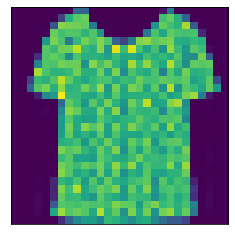

In [31]:
plt.imshow(test_images[1000])
plt.xticks([])
plt.yticks([])

In [32]:
print(test_labels[1000])

0


In [33]:
class_names[0]

'T-shirt/top'

([], [])

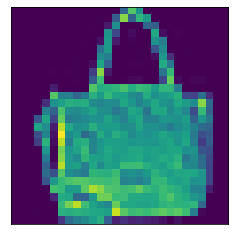

In [37]:
plt.imshow(test_images[2000])
plt.xticks([])
plt.yticks([])

In [38]:
print(test_labels[2000])

8


In [40]:
class_names[8]

'Bag'

([], [])

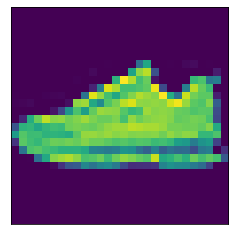

In [45]:
plt.imshow(test_images[8000])
plt.xticks([])
plt.yticks([])

In [61]:
test_images[8000].shape

(28, 28)

In [46]:
print(test_labels[8000])

7


In [47]:
class_names[7]

'Sneaker'

**We can see that in all the three cases the model has predicted the images correctly**